<font color = blue>TITLE</font>: K Nearest Neighbor Modeling of Car Prices

<font color = blue>DESCRIPTION</font>

In [1]:
import pandas as pd

In [2]:
column_names = ['symbolizing', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 
                'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
                'height', 'curb-weight', 'engine-type', 'no-of-cylinders', 'engine-size', 
                'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 
                'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.DATA', header = None, names = column_names)
cars.head(2)

,symbolizing,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [3]:
cars.loc[:, "wheel-base":'engine-size'].head(2)

,wheel-base,length,width,height,curb-weight,engine-type,no-of-cylinders,engine-size
0,88.6,168.8,64.1,48.8,2548,dohc,four,130
1,88.6,168.8,64.1,48.8,2548,dohc,four,130


Comment:  Looks like the numeric values are columns `wheel-base` - `curb-weight`, `engine-size`, 
`bore` - `price`

In [4]:
pd.set_option('display.max_rows', 300)

In [5]:
#replace missing values with numpy.nan
import numpy as np
cars.replace(to_replace = "?", value = np.nan, inplace = True)

In [6]:
cars.loc[:,'wheel-base':'price'].head(2)

,wheel-base,length,width,height,curb-weight,engine-type,no-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


In [7]:
data_types = {'bore': float, 'stroke': float, 'horsepower': float, 'peak-rpm': float, 'price': float}
cars = cars.astype(data_types)
cars.dtypes

symbolizing            int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
no-of-cylinders       object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

In [8]:
cars.isna().sum()

symbolizing           0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
no-of-cylinders       0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
cars.drop(['normalized-losses', 'symbolizing'], axis = 1, inplace = True)
cars.head(2)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0


In [10]:
cars.dropna(axis = 0, inplace = True)

In [11]:
cars

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,13495.0
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.00,111.0,5000.0,21,27,16500.0
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.00,154.0,5000.0,19,26,16500.0
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.00,102.0,5500.0,24,30,13950.0
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.00,115.0,5500.0,18,22,17450.0
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,15250.0
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,17710.0
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.50,110.0,5500.0,19,25,18920.0
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.30,140.0,5500.0,17,20,23875.0
10,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,...,108,mpfi,3.50,2.80,8.80,101.0,5800.0,23,29,16430.0


In [12]:
#check for NaN values
cars.isna().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
no-of-cylinders      0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [15]:
#numeric columns
cars.select_dtypes('number').columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size',
       'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [16]:
#normalize (x -min)/(max - min) numeric values to 0 - 1 scale
num_columns = ['wheel-base', 'length', 'width',
               'height', 'curb-weight', 'engine-size', 
               'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 
               'city-mpg', 'highway-mpg', 'price']
norm_cars = pd.DataFrame(columns = num_columns)
for column in num_columns:
    norm_cars[column] = (cars[column] - cars[column].min())/(cars[column].max() - cars[column].min())

In [17]:
#check normalization
norm_cars.describe()

,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,0.359295,0.495917,0.478101,0.505829,0.416411,0.253299,0.564730,0.561362,0.196477,0.259261,0.387649,0.342401,0.389146,0.202746
std,0.179371,0.186248,0.182718,0.199564,0.204306,0.156945,0.194560,0.150200,0.248593,0.177384,0.191304,0.177440,0.179392,0.200811
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230321,0.376119,0.324786,0.350000,0.254849,0.139623,0.435714,0.495238,0.093750,0.102804,0.265306,0.166667,0.236842,0.065041
50%,0.303207,0.479104,0.435897,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.387755,0.333333,0.368421,0.127278
75%,0.460641,0.649254,0.564103,0.658333,0.567882,0.320755,0.750000,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,0.282930
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [18]:
#check for NaN
norm_cars.isna().sum()

wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [19]:
#check norm_car shape
norm_cars.shape

(193, 14)

In [37]:
#simple univariate knn train and test function
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(df,train_col,target_col,k):
    knn =KNeighborsRegressor(n_neighbors = k)
    train_set = df.iloc[0:int(.75 * len(df))]
    test_set = df.iloc[int(.25 * len(df)):]
    #train
    train_features = train_set[train_col]
    train_target = train_set[target_col]
    knn.fit(train_features, train_target)
    #predict
    predictions = knn.predict(train_set[train_col])
    
    return mean_squared_error(train_target, predictions)**.5,train_col
    
    

From an earlier draft of this univariate model function, the lowest RMSE for target variable 
`price` is the attribute `engine size`.  Attributes and RMSE's are as follows:

{'wheel-base': 0.11929133222686396,
 'length': 0.11708320845209057,
 'width': 0.09026550849437863,
 'height': 0.18033888720508934,
 'curb-weight': 0.10457289104284674,
 'engine-size': 0.05717404089561135,
 'bore': 0.15157458099084362,
 'stroke': 0.15625218253451467,
 'compression-ratio': 0.14792630179672525,
 'horsepower': 0.08300045639127641,
 'peak-rpm': 0.1558760843729852,
 'city-mpg': 0.08572817933498644,
 'highway-mpg': 0.11557282170815958}
 
<br><br><br>

In [44]:
#shuffle data set and execute knn_train_test function with various k's on the engine-size variable
RMSE_eng_list = []
k = [1,3,5,7,9]
column = ['engine-size']
for i in k:
    norm_cars.reindex(np.random.permutation(norm_cars.index))
    RMSE_eng = knn_train_test(norm_cars, column, 'price', i)
    RMSE_eng_list.append([i,RMSE_eng])

In [45]:
print('k', '(RMSE_eng, attribute)')
RMSE_eng_list

k (RMSE_eng, attribute)


[[1, (0.07651965859005316, ['engine-size'])],
 [3, (0.05320063659493859, ['engine-size'])],
 [5, (0.05717404089561135, ['engine-size'])],
 [7, (0.06314867749074532, ['engine-size'])],
 [9, (0.0731598774001187, ['engine-size'])]]

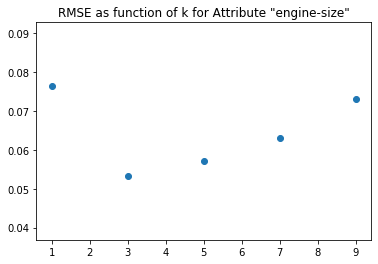

In [46]:
#plot engine-size RMSE as function of k
import matplotlib.pyplot as plt
%matplotlib inline
x_eng = []
y_eng = []
for i in RMSE_eng_list:
    x_eng.append(i[0])
    y_eng.append(i[1][0])
plt.scatter(x_eng,y_eng)
plt.title('RMSE as function of k for Attribute "engine-size"')
plt.show()

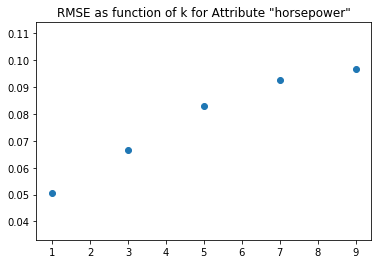

In [41]:
#Repeat above plotting on next best RMSE variable: horsepower
RMSE_horse_list = []
k = [1,3,5,7,9]
column_horse = ['horsepower']
for i in k:
    norm_cars.reindex(np.random.permutation(norm_cars.index))
    RMSE_horse = knn_train_test(norm_cars, column_horse, 'price', i)
    RMSE_horse_list.append([i,RMSE_horse])

x_horse = []
y_horse = []
for i in RMSE_horse_list:
    x_horse.append(i[0])
    y_horse.append(i[1][0])
plt.scatter(x_horse,y_horse)
plt.title('RMSE as function of k for Attribute "horsepower"')
plt.show()

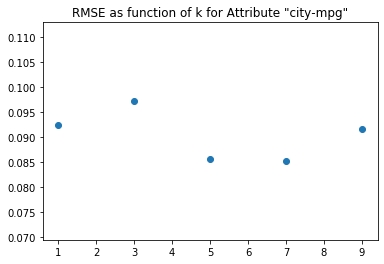

In [35]:
#Repeat above plotting on next best RMSE variable: city-mpg
RMSE_citympg_list = []
k = [1,3,5,7,9]
column_citympg = ['city-mpg']
for i in k:
    norm_cars.reindex(np.random.permutation(norm_cars.index))
    RMSE_citympg = knn_train_test_mult(norm_cars, column_citympg, 'price', i)
    RMSE_citympg_list.append([i,RMSE_citympg])

x_citympg = []
y_citympg = []
for i in RMSE_citympg_list:
    x_citympg.append(i[0])
    y_citympg.append(i[1][0])
plt.scatter(x_citympg,y_citympg)
plt.title('RMSE as function of k for Attribute "city-mpg"')
plt.show()

Looks like there's a tradeoff minimum RMSE for a given k with these three attributes.  I'm going to use k=5 for
a 3 attribute analysis. Based on the RMSE `engine-size` provides the best correlation to price.  The RMSE's then step up to two RMSE's that are close to each other, `horsepower` and `city-mpg`.  There is another step to the remaining RMSE's.  I'm going to limit the multi attribute analysis to the 3 lowest univariate RMSE attributes. 
<br><br><br>

In [182]:
#after all that did the norm_cars, train or test data_sets get messed up? 
print('NORM_CARS')
print(norm_cars.head(),'\n')
print('NaN:',norm_cars.isna().sum(),'\n')
print('shape:',norm_cars.shape,'\n\n')

print('TRAIN_SET')
print(train_set.head(),'\n')
print('NaN:',train_set.isna().sum(),'\n')
print('shape:' ,train_set.shape,'\n\n')

print('TEST_SET')
print(test_set.head(),'\n')
print('NaN:',test_set.isna().sum(),'\n')
print('shape:',test_set.shape,'\n\n')

NORM_CARS
   wheel-base    length     width    height  curb-weight  engine-size  \
0    0.058309  0.413433  0.324786  0.083333     0.411171     0.260377   
1    0.058309  0.413433  0.324786  0.083333     0.411171     0.260377   
2    0.230321  0.449254  0.444444  0.383333     0.517843     0.343396   
3    0.384840  0.529851  0.504274  0.541667     0.329325     0.181132   
4    0.373178  0.529851  0.521368  0.541667     0.518231     0.283019   

       bore    stroke  compression-ratio  horsepower  peak-rpm  city-mpg  \
0  0.664286  0.290476             0.1250    0.294393  0.346939  0.222222   
1  0.664286  0.290476             0.1250    0.294393  0.346939  0.222222   
2  0.100000  0.666667             0.1250    0.495327  0.346939  0.166667   
3  0.464286  0.633333             0.1875    0.252336  0.551020  0.305556   
4  0.464286  0.633333             0.0625    0.313084  0.551020  0.138889   

   highway-mpg     price  
0     0.289474  0.207959  
1     0.289474  0.282558  
2     0.26315

Dataframes look ok.<br><br><br>

In [50]:
#train a 3 attribute model with the number of nearest neighbors (k) = 5

column_3attr = ['engine-size', 'horsepower','city-mpg']
norm_cars.reindex(np.random.permutation(norm_cars.index))
RMSE_3attr_k5 = knn_train_test(norm_cars, column, 'price', 5)
print('Engine-size, horsepower, city-mpg model RMSE with k = 5:', RMSE_3attr_k5[0])

Engine-size, horsepower, city-mpg model RMSE with k = 5: 0.05485925214744611


In [51]:
#train a 3 attribute model with the number of nearest neighbors (k) = 3
norm_cars.reindex(np.random.permutation(norm_cars.index))
RMSE_3attr_k3 = knn_train_test(norm_cars, column_3attr, 'price', 3)
print('Engine-size, horsepower, city-mpg model RMSE with k = 3:', RMSE_3attr_k3[0])

Engine-size, horsepower, city-mpg model RMSE with k = 3: 0.044760564424763956


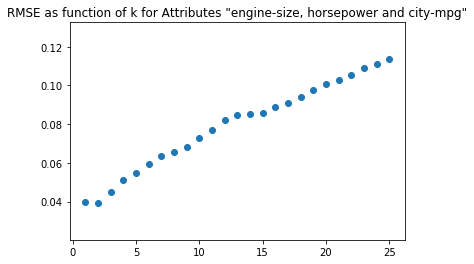

In [53]:
#Varying k size appears to affect the model.  I'm going to try a range of k's for this model
RMSE_3attr_list = []
for i in range(1,26):
    norm_cars.reindex(np.random.permutation(norm_cars.index))
    RMSE_3attr = knn_train_test_mult(norm_cars, column_3attr, 'price', i)
    RMSE_3attr_list.append([i,RMSE_3attr])

x_3attr = []
y_3attr = []
for i in RMSE_3attr_list:
    x_3attr.append(i[0])
    y_3attr.append(i[1][0])
plt.scatter(x_3attr,y_3attr)
plt.title('RMSE as function of k for Attributes "engine-size, horsepower and city-mpg"')
plt.show()


<font color = blue>DISCUSSION</font>:

The 3 attribute, k = 3 knn model using engine-size, horsepower and city-mpg as attributes to predict price gave a root mean square error of ~.045.  This model was built with the attributes and price normalized to a scale of 0 to 1. the RMSE is the standard deviation of the residuals, i.e. difference between the actual prices and their prediction.

<font color = blue>CONCLUSION</font>:

Considering the price values are on a scale from 0 to 1 and the standard deviation of the residuals is small (~.045), I conclude that the 3 attribute, k = 3 knn regression model is adequate for estimating car prices on new data in the future. 